# 1.Packages

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

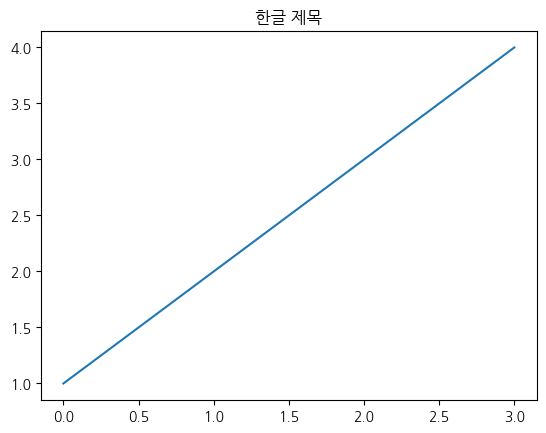

In [18]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [19]:
import os
import time
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 2.Data

In [20]:
path = '/content/drive/MyDrive/Machine Learning project/Data/13.Dataset'
all_files = glob.glob(os.path.join(path, "*.dat"))

In [21]:
df_from_each_file = (pd.read_csv(f, sep="\s+",index_col=0, header=None) for f in all_files)
df = pd.concat(df_from_each_file, sort=True)

# 각 셀마다 feature 와 value 를 나눠준다 (예 --> 1:15596.16 ---> 15596.16)
for col in df.columns.values:
    df[col] = df[col].apply(lambda x: float(str(x).split(':')[1]))

df = df.rename_axis('Gas').reset_index()

df.sort_values(by=['Gas'],inplace=True)
df.reset_index(drop=True,inplace=True)

# 3.EDA

In [22]:
df.Gas.nunique()

6

In [23]:
df.head()

,Gas,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,21749.5635,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,...,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
1,1,5328.6660,1.266921,3.709243,6.581166,11.198361,-1.325732,-1.990888,-7.377599,2784.9199,...,-0.982648,-3.343571,1661.7754,1.396912,2.570595,8.228328,11.772317,-0.505640,-0.911800,-3.855399
2,1,74847.6601,4.838308,19.525776,27.916995,36.613797,-14.421252,-19.122846,-71.084868,64937.3985,...,-14.788213,-30.968435,24090.1186,6.972532,8.505489,16.986964,20.734349,-7.358917,-12.864915,-25.400758
3,1,26627.8242,2.366808,6.978571,10.078695,15.863936,-5.706522,-7.684927,-17.877250,19481.4824,...,-3.619030,-7.231487,6741.2661,2.618740,3.349491,9.940488,12.889075,-1.974888,-3.359902,-6.464311
4,1,44102.9023,3.347359,11.314284,15.764272,21.477507,-8.876120,-12.286921,-30.499795,36265.9395,...,-6.581327,-10.946042,11906.5662,3.934876,4.594893,11.938498,15.350035,-3.469519,-5.840424,-10.569223


In [24]:
df.shape

(13910, 129)

In [25]:
# 통계값
df.describe()

,Gas,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,...,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,3.387994,50435.066174,6.638156,12.936688,18.743953,26.890695,-9.158655,-14.402383,-59.927598,57340.104585,...,-9.601927,-19.136500,19688.565373,6.072066,7.138634,14.929364,19.090980,-4.901016,-8.167792,-16.089791
std,1.728602,69844.785952,13.486391,17.610061,24.899450,38.107685,12.729206,21.304606,131.017675,64045.265134,...,9.220031,26.516679,14281.652395,4.642192,5.248573,12.437311,14.391810,4.195360,7.637701,20.958479
min,1.000000,-16757.598600,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-1664.735576,-16119.460900,...,-76.069200,-482.278033,-8297.548800,0.712112,0.003238,0.011488,0.118849,-30.205911,-58.844076,-410.152297
25%,2.000000,6694.725950,2.284843,1.633350,2.386836,4.967988,-11.587169,-17.292559,-48.492764,13287.301875,...,-13.212575,-22.363498,8837.838750,3.007381,3.059178,5.407551,8.039227,-6.789599,-11.162406,-18.938690
50%,3.000000,19364.439350,3.871227,4.977123,7.250892,11.680725,-3.338700,-4.956917,-14.040088,37764.263200,...,-7.338850,-13.527887,16313.967300,4.973783,5.809107,11.325214,14.560676,-3.881763,-6.305962,-11.747499
75%,5.000000,63104.837125,8.400619,17.189166,26.411109,34.843226,-1.126897,-1.670327,-5.212213,70300.782575,...,-3.260080,-7.358031,27009.592425,7.389566,10.222169,21.207572,26.547437,-1.804032,-2.874532,-6.429690
max,6.000000,670687.347700,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,502202.812500,...,9.270956,11.516418,96706.792700,45.574835,32.203601,297.225880,195.242555,-0.003817,6.851792,8.357968


In [26]:
# 데이터 타입
pd.unique(df.dtypes)

array([dtype('int64'), dtype('float64')], dtype=object)

## 3.1 Target Feature

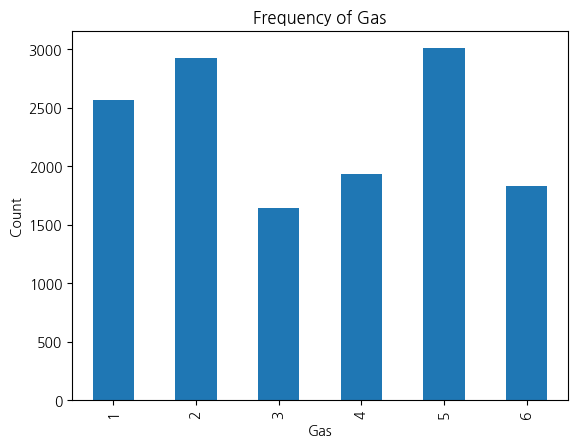

In [27]:
# Target Feature
# Ethanol Ethylene Ammonia Acetaldehyde Acetone Toluene
#    1       2        3          4         5       6

df['Gas'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Gas')
plt.ylabel('Count')
plt.title('Frequency of Gas')
plt.show()

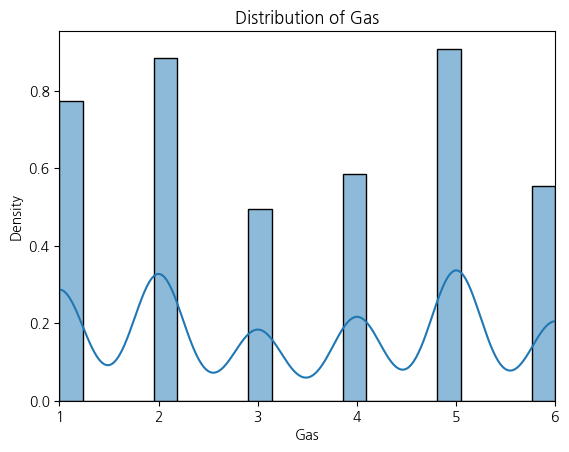

In [28]:
# density
sns.histplot(df.Gas, kde = True, stat='density')
plt.xlim(1, 6)
plt.title('Distribution of Gas')
plt.show()

## 3.2 Column 1

In [29]:
# 농도가 다른 컬럼 확인
# df.gas
conc = df.iloc[:,1]

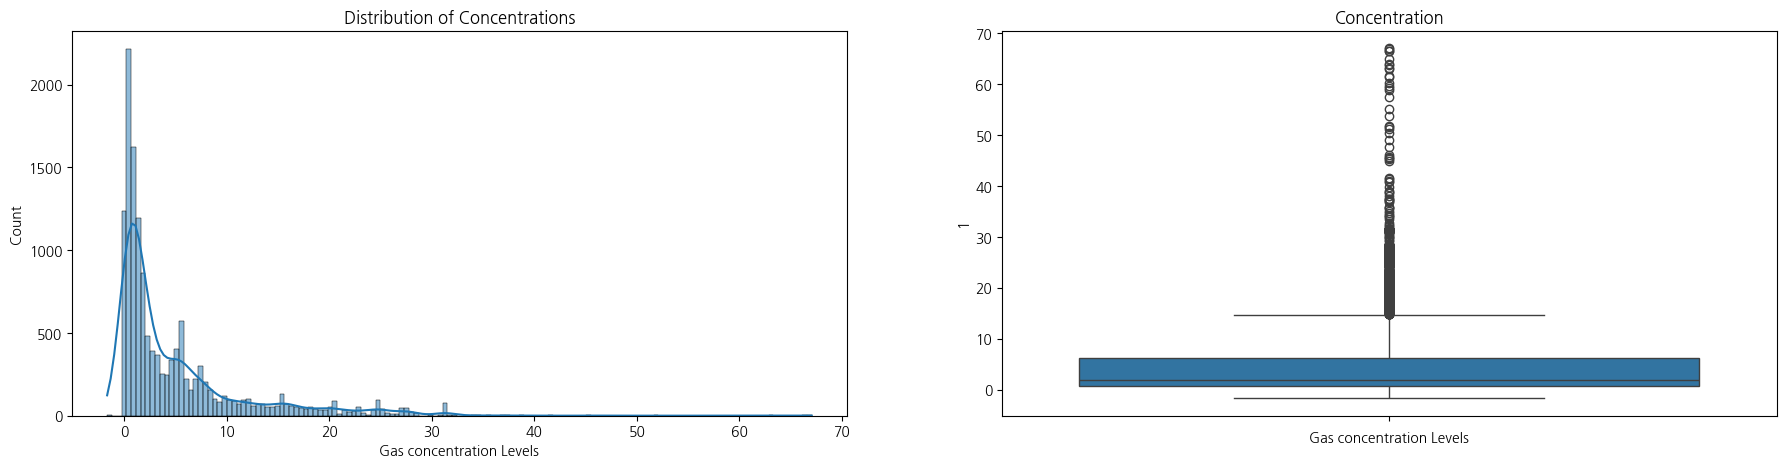

In [30]:
# 농도가 다른 컬럼 시각화
conc_red = conc.apply(lambda x: x/10000)

fig = plt.figure(figsize=(22, 5))
fig.add_subplot(121)
sns.histplot(conc_red, kde = True)
plt.title('Distribution of Concentrations')
plt.xlabel('Gas concentration Levels')

fig.add_subplot(122)
sns.boxplot(conc_red)
plt.title('Concentration')
plt.xlabel('Gas concentration Levels')

plt.show()

In [31]:
# 데이터 확인
attr = df.iloc[:, 2:].copy()
attr.head()

,2,3,4,5,6,7,8,9,10,11,...,119,120,121,122,123,124,125,126,127,128
0,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,2.713281,3.612213,...,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
1,1.266921,3.709243,6.581166,11.198361,-1.325732,-1.990888,-7.377599,2784.9199,1.088861,3.023577,...,-0.982648,-3.343571,1661.7754,1.396912,2.570595,8.228328,11.772317,-0.505640,-0.911800,-3.855399
2,4.838308,19.525776,27.916995,36.613797,-14.421252,-19.122846,-71.084868,64937.3985,3.115072,18.039938,...,-14.788213,-30.968435,24090.1186,6.972532,8.505489,16.986964,20.734349,-7.358917,-12.864915,-25.400758
3,2.366808,6.978571,10.078695,15.863936,-5.706522,-7.684927,-17.877250,19481.4824,1.636147,5.865301,...,-3.619030,-7.231487,6741.2661,2.618740,3.349491,9.940488,12.889075,-1.974888,-3.359902,-6.464311
4,3.347359,11.314284,15.764272,21.477507,-8.876120,-12.286921,-30.499795,36265.9395,2.221912,9.966614,...,-6.581327,-10.946042,11906.5662,3.934876,4.594893,11.938498,15.350035,-3.469519,-5.840424,-10.569223


## 3.3 Correlation

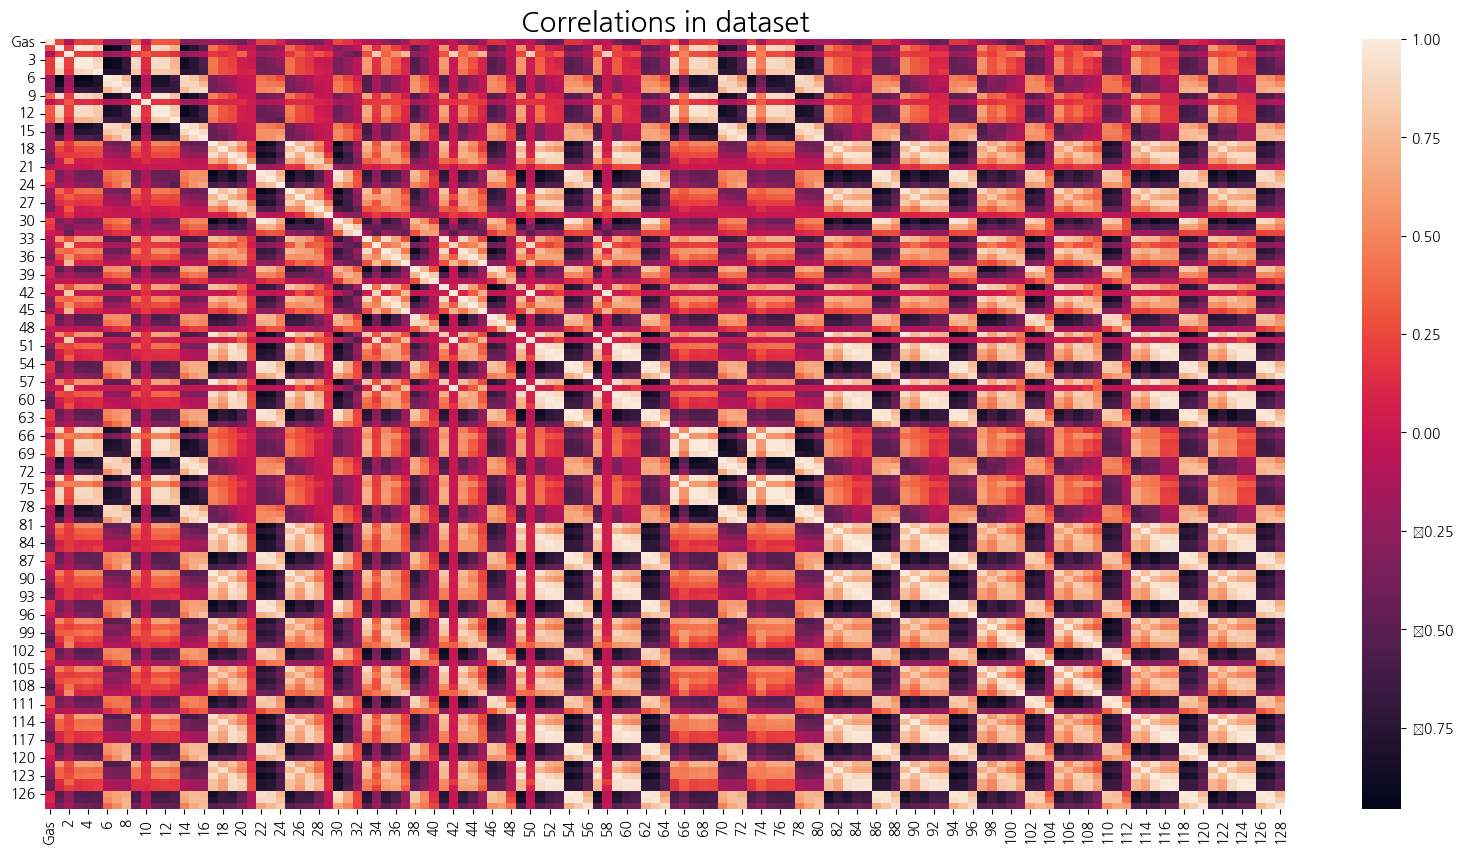

In [32]:
# 상관도 분석
# 상관계수 계산
correlation = df.corr(numeric_only=False)

# Heatmap
f, ax = plt.subplots(figsize=(20,10))
plt.title('Correlations in dataset', size=20)
sns.heatmap(correlation)
plt.show()

In [33]:
# 상관계수 상위 20개(양수, 음수)
# 상관계수 정렬
conc_corr = correlation.iloc[:, 1].sort_values(ascending=False)

# 상관계수 상위 20개
conc_corr[1:].head(20)

3      0.983710
4      0.964275
73     0.931922
9      0.925908
65     0.918925
11     0.907179
75     0.907141
67     0.894082
76     0.883304
12     0.880074
68     0.870845
5      0.852414
77     0.808763
69     0.779136
13     0.694674
121    0.584990
113    0.583377
33     0.571334
41     0.565753
49     0.536699
Name: 1, dtype: float64

In [34]:
# 상위 20개 (음수)
conc_corr[1:].tail(20)

102   -0.462186
119   -0.467363
127   -0.473974
54    -0.474011
72    -0.497401
38    -0.500108
46    -0.501147
118   -0.514472
126   -0.520602
80    -0.538281
16    -0.544650
8     -0.677211
71    -0.752262
15    -0.755876
79    -0.801174
70    -0.862056
78    -0.874178
14    -0.878040
7     -0.882787
6     -0.951382
Name: 1, dtype: float64

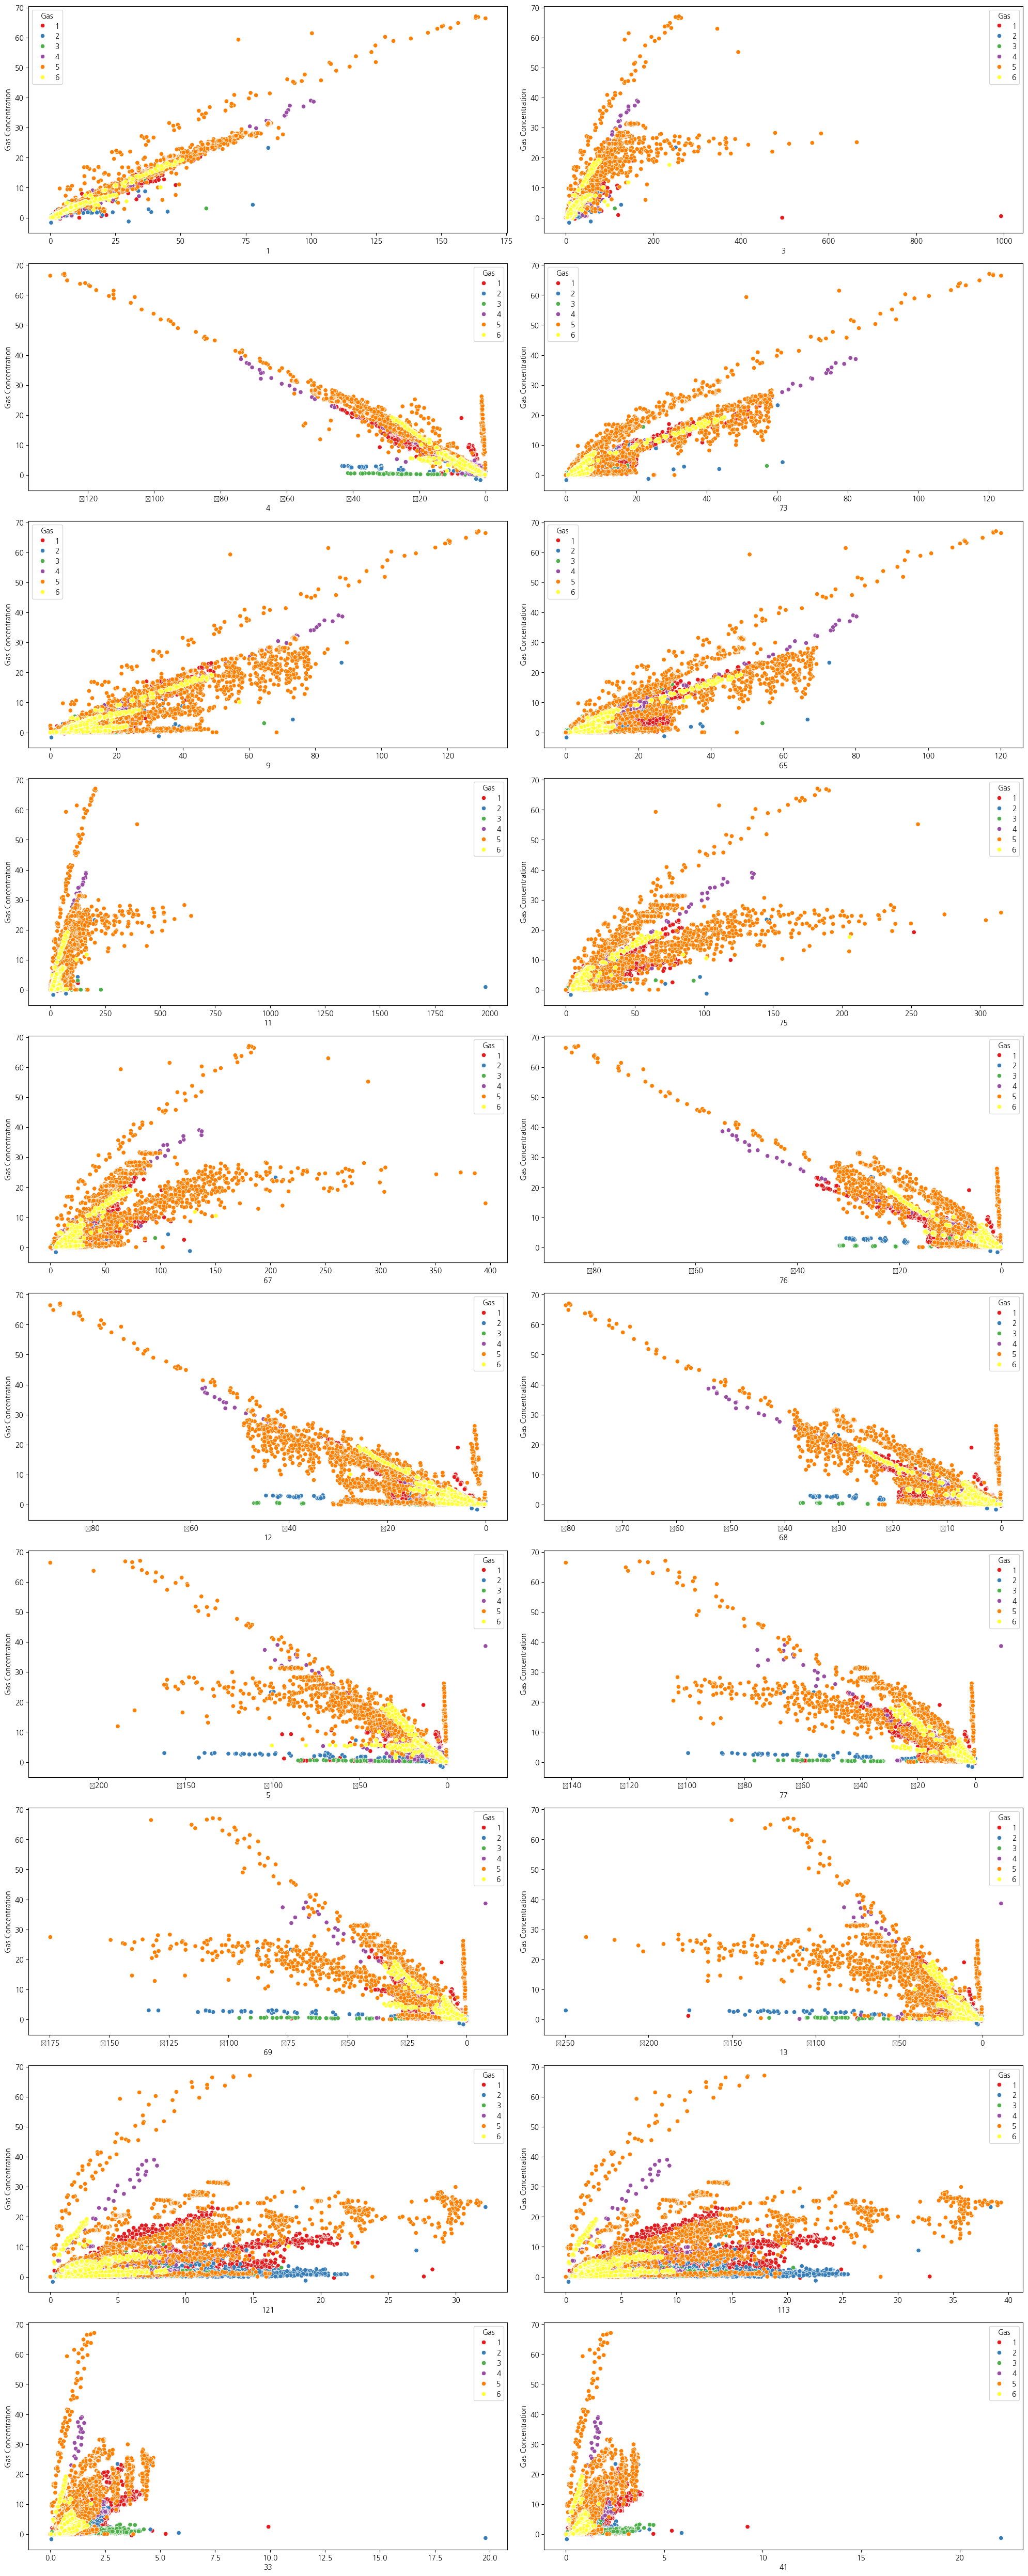

In [35]:
fig = plt.figure(figsize=(20,50))
for i in range(0,20):
    fig.add_subplot(10,2,i+1)
    sns.scatterplot(x=attr.iloc[:, conc_corr.index[i]], y=conc_red, data = df,hue="Gas", palette="Set1", legend="full")
    plt.xlabel(conc_corr.index[i])
    plt.ylabel("Gas Concentration")

fig.tight_layout()
plt.show()

# 4.PCA

In [36]:
df_copy = df.copy()

X = df_copy.iloc[:, 1:]
y = df_copy.iloc[:, 0]

In [37]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,21749.5635,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,2.713281,...,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
1,5328.6660,1.266921,3.709243,6.581166,11.198361,-1.325732,-1.990888,-7.377599,2784.9199,1.088861,...,-0.982648,-3.343571,1661.7754,1.396912,2.570595,8.228328,11.772317,-0.505640,-0.911800,-3.855399
2,74847.6601,4.838308,19.525776,27.916995,36.613797,-14.421252,-19.122846,-71.084868,64937.3985,3.115072,...,-14.788213,-30.968435,24090.1186,6.972532,8.505489,16.986964,20.734349,-7.358917,-12.864915,-25.400758
3,26627.8242,2.366808,6.978571,10.078695,15.863936,-5.706522,-7.684927,-17.877250,19481.4824,1.636147,...,-3.619030,-7.231487,6741.2661,2.618740,3.349491,9.940488,12.889075,-1.974888,-3.359902,-6.464311
4,44102.9023,3.347359,11.314284,15.764272,21.477507,-8.876120,-12.286921,-30.499795,36265.9395,2.221912,...,-6.581327,-10.946042,11906.5662,3.934876,4.594893,11.938498,15.350035,-3.469519,-5.840424,-10.569223


In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gas, dtype: int64

## 4.1 PCA 3D graph

In [39]:
# 테스트 모델 생성
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X)

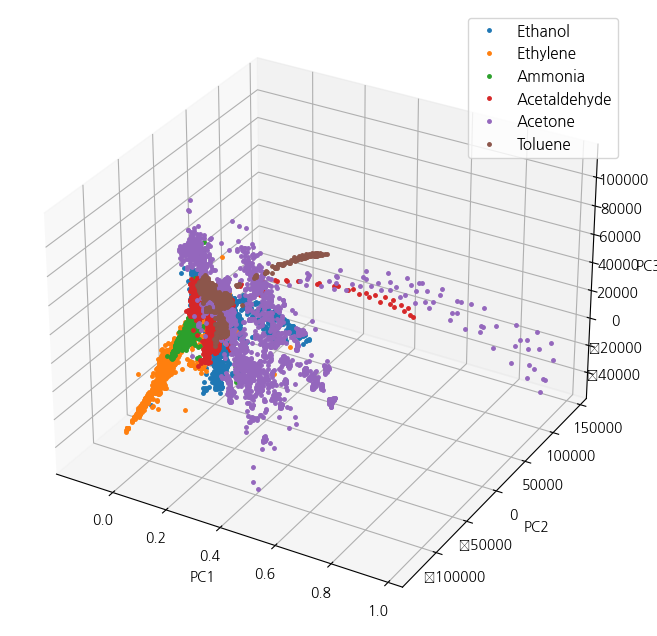

In [40]:
# 시각화
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11
ax.plot(X_train[0:2564,0], X_train[0:2564,1], X_train[0:2564,2], 'o', markersize=2.5, label='Ethanol')
ax.plot(X_train[2565:5490,0], X_train[2565:5490,1], X_train[2565:5490,2], 'o', markersize=2.5, label='Ethylene')
ax.plot(X_train[5491:7131,0], X_train[5491:7131,1], X_train[5491:7131,2], 'o', markersize=2.5, label='Ammonia')
ax.plot(X_train[7132:9067,0], X_train[7132:9067,1], X_train[7132:9067,2], 'o', markersize=2.5, label='Acetaldehyde')
ax.plot(X_train[9068:12076,0], X_train[9068:12076,1], X_train[9068:12076,2], 'o', markersize=2.5, label='Acetone')
ax.plot(X_train[12077:13909,0], X_train[12077:13909,1], X_train[12077:13909,2], 'o', markersize=2.5, label='Toluene')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='upper right')

plt.show()

## 4.2 T-SNE 3D graph

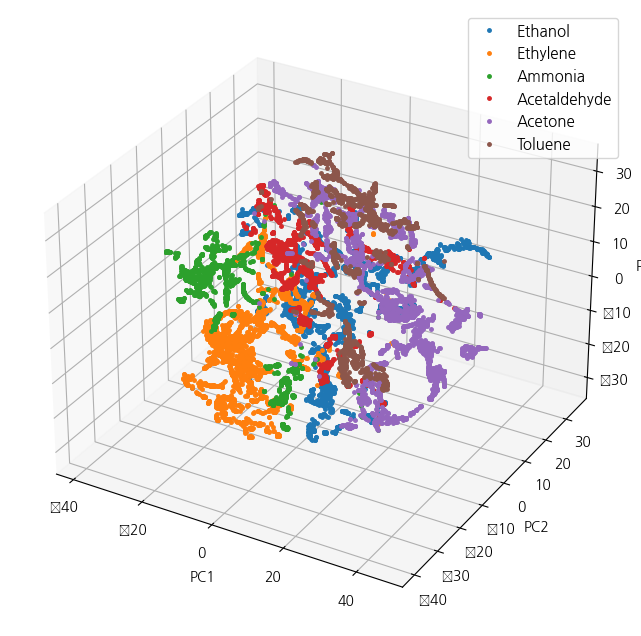

In [ ]:
# t-SNE 그래프
tsne= TSNE(n_components=3,n_iter=3000)
xtrain=tsne.fit_transform(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11
ax.plot(xtrain[0:2564,0], xtrain[0:2564,1], xtrain[0:2564,2], 'o', markersize=2.5, label='Ethanol')
ax.plot(xtrain[2565:5490,0], xtrain[2565:5490,1], xtrain[2565:5490,2], 'o', markersize=2.5, label='Ethylene')
ax.plot(xtrain[5491:7131,0], xtrain[5491:7131,1], xtrain[5491:7131,2], 'o', markersize=2.5, label='Ammonia')
ax.plot(xtrain[7132:9067,0], xtrain[7132:9067,1], xtrain[7132:9067,2], 'o', markersize=2.5, label='Acetaldehyde')
ax.plot(xtrain[9068:12076,0], xtrain[9068:12076,1], xtrain[9068:12076,2], 'o', markersize=2.5, label='Acetone')
ax.plot(xtrain[12077:13909,0], xtrain[12077:13909,1], xtrain[12077:13909,2], 'o', markersize=2.5, label='Toluene')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='upper right')
plt.show()

## 4.3 Eigen values, Eigen vetor

In [41]:
# scaliling
X_scaled = X.copy()
X_scaled = StandardScaler().fit(X_scaled).transform(X_scaled)

In [42]:
# Covariance Matrix
cov_matrix = np.cov(X_scaled.T)

In [43]:
# Eigen Values, Eigen Vector
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[-0.0645562  -0.16074832  0.07673187 ...  0.00051322  0.00224816
  -0.0013844 ]
 [-0.03928322  0.0131181   0.25758087 ...  0.00514165  0.00485384
   0.00466299]
 [-0.06963195 -0.15302955  0.08311936 ... -0.00806183  0.00379264
  -0.01315294]
 ...
 [ 0.11390782  0.02311344  0.04943856 ... -0.08895415 -0.16008231
  -0.37390377]
 [ 0.11165071  0.0255479   0.08134247 ...  0.01198192  0.04949433
   0.06876995]
 [ 0.08574406  0.03615492  0.14675375 ... -0.0007436   0.00128002
   0.00310437]]

Eigenvalues 
[6.85042981e+01 1.92526590e+01 7.73912358e+00 6.50925577e+00
 4.51574701e+00 3.71997843e+00 2.98686088e+00 2.00916826e+00
 1.85511435e+00 1.49931765e+00 1.31375992e+00 1.14936406e+00
 9.00292272e-01 7.89745838e-01 6.85881726e-01 5.78044819e-01
 4.74517874e-01 3.65584238e-01 3.45677293e-01 3.16136647e-01
 2.63945383e-01 2.31781051e-01 2.12481812e-01 1.79795875e-01
 1.54232070e-01 1.48625600e-01 1.19601193e-01 1.01662791e-01
 9.66988484e-02 7.22834259e-02 6.47650714e-02 5.78556

In [44]:
tot = sum(eig_val)
var_exp = [( i /tot ) * 100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("누적 분산 설명력", cum_var_exp)

누적 분산 설명력 [ 53.51513539  68.55519394  74.60094957  79.68594005  83.21361378
  86.11963799  88.45295529  90.02250515  91.47170905  92.64296675
  93.6692679   94.56714402  95.2704468   95.88739138  96.42319795
  96.874763    97.24545344  97.53104559  97.80108656  98.04805056
  98.25424307  98.435309    98.60129848  98.74175391  98.86223905
  98.97834445  99.07177617  99.15119451  99.22673506  99.28320242
  99.3337965   99.37899299  99.4219317   99.45953852  99.49590818
  99.53087312  99.563476    99.59494978  99.62255888  99.64784141
  99.67046802  99.69177561  99.7103468   99.72756841  99.74431185
  99.76041583  99.77621149  99.79159572  99.80487506  99.81740006
  99.82946985  99.84073248  99.85129979  99.86090798  99.86962065
  99.87787534  99.88571422  99.89264164  99.89932576  99.90537033
  99.91127457  99.91664737  99.92162254  99.92654255  99.93112871
  99.93530431  99.93937299  99.94334187  99.94707578  99.9505909
  99.95391235  99.95706009  99.96002937  99.96286255  99.96552932
 

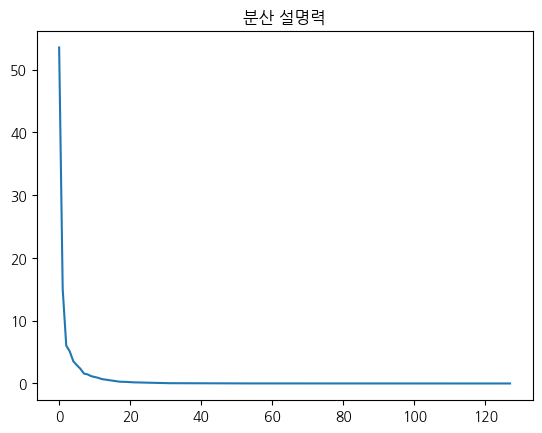

In [45]:
plt.title('분산 설명력')
plt.plot(var_exp);

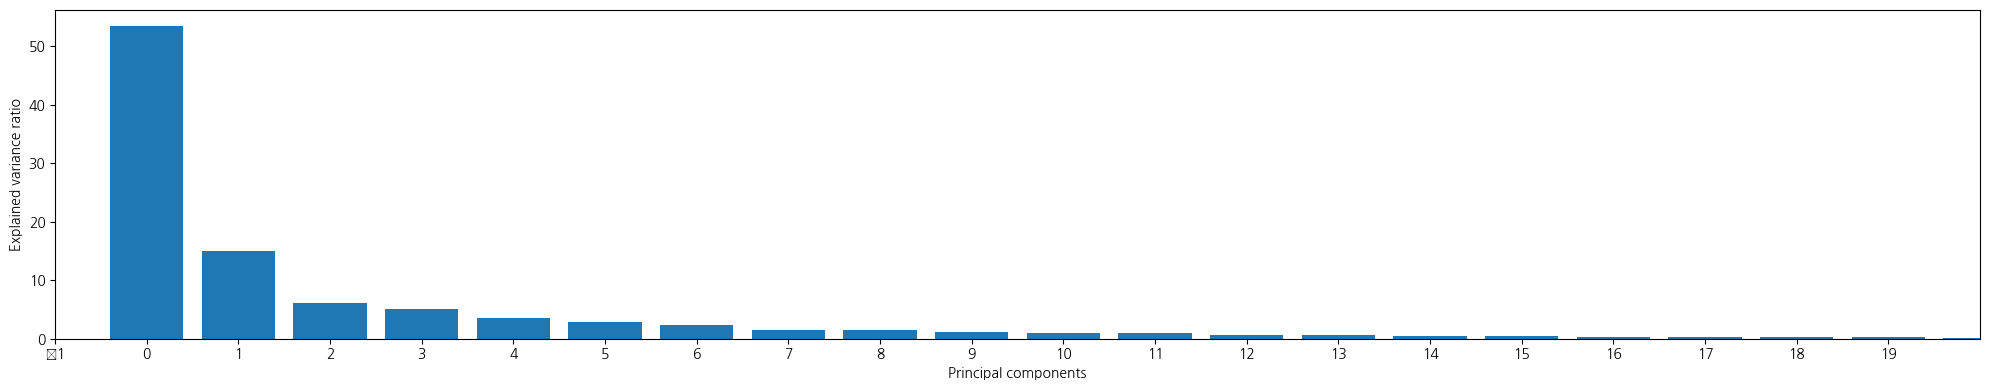

In [46]:
plt.figure(figsize=(20, 4))
plt.bar(range(128), var_exp)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xlim(0,20)
plt.xticks(range(-1, 20))
plt.tight_layout()

## 4.4 Sckit-learn PCA

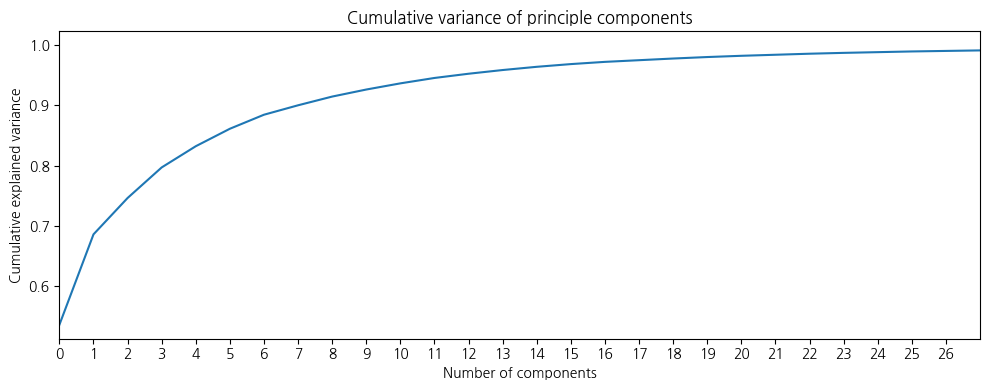

In [47]:
# Scikit-learn으로 PCA 적용하기
pca = PCA()
X_scaled = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,27)
plt.xticks(range(0,27))
plt.title('Cumulative variance of principle components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.tight_layout()

In [48]:
print(pca.explained_variance_ratio_)

[5.35151354e-01 1.50400585e-01 6.04575563e-02 5.08499048e-02
 3.52767372e-02 2.90602421e-02 2.33331730e-02 1.56954986e-02
 1.44920390e-02 1.17125771e-02 1.02630115e-02 8.97876122e-03
 7.03302773e-03 6.16944581e-03 5.35806576e-03 4.51565049e-03
 3.70690438e-03 2.85592153e-03 2.70040970e-03 2.46964000e-03
 2.06192506e-03 1.81065928e-03 1.65989482e-03 1.40455429e-03
 1.20485142e-03 1.16105403e-03 9.34317149e-04 7.94183453e-04
 7.55405442e-04 5.64673667e-04 5.05940745e-04 4.51964933e-04
 4.29387084e-04 3.76068232e-04 3.63696523e-04 3.49649402e-04
 3.26028840e-04 3.14737802e-04 2.76090995e-04 2.52825321e-04
 2.26266069e-04 2.13075933e-04 1.85711913e-04 1.72216049e-04
 1.67434435e-04 1.61039791e-04 1.57956606e-04 1.53842337e-04
 1.32793336e-04 1.25249975e-04 1.20697976e-04 1.12626251e-04
 1.05673149e-04 9.60818774e-05 8.71266938e-05 8.25468534e-05
 7.83888702e-05 6.92742002e-05 6.68411576e-05 6.04457647e-05
 5.90423887e-05 5.37279875e-05 4.97516644e-05 4.92001569e-05
 4.58615714e-05 4.175597

12개의 성분만으로 약 95%의 설명력을 가질 수 있음

# 5.Classifier Modeling

## 5.1 Class label binarize

In [49]:
# label Encoding
from sklearn.preprocessing import label_binarize
y_ohe = label_binarize(y, classes = [1,2,3,4,5,6])
n_classes = y_ohe.shape[1]

In [50]:
y_ohe

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [51]:
n_classes

6

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

y_train_nobinary = y_train.copy()
y_test_nobinary = y_test.copy()

In [53]:
# Scailing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_binarize(y_train, classes=[1,2,3,4,5,6])
y_test = label_binarize(y_test, classes=[1,2,3,4,5,6])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=4)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 5.2 Random Forest

In [55]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
random=clf.fit(X_train,y_train)

y_pred =random.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(random,X_test,y_test).mean())

ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
cross validation acc   : 0.9845414153416943


Confusion matrix, without normalization
[[526   1   0   0   0   0]
 [  0 587   0   0   3   0]
 [  0   2 310   0   3   0]
 [  0   0   0 384   0   3]
 [  0   0   1   1 601   2]
 [  1   0   0   1   0 356]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.01 0.  ]
 [0.   0.01 0.98 0.   0.01 0.  ]
 [0.   0.   0.   0.99 0.   0.01]
 [0.   0.   0.   0.   0.99 0.  ]
 [0.   0.   0.   0.   0.   0.99]]


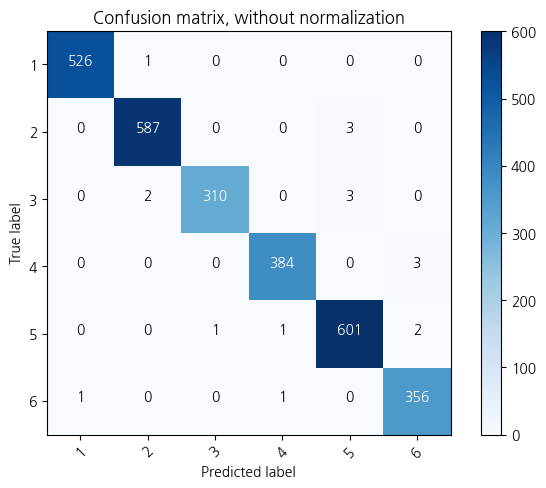

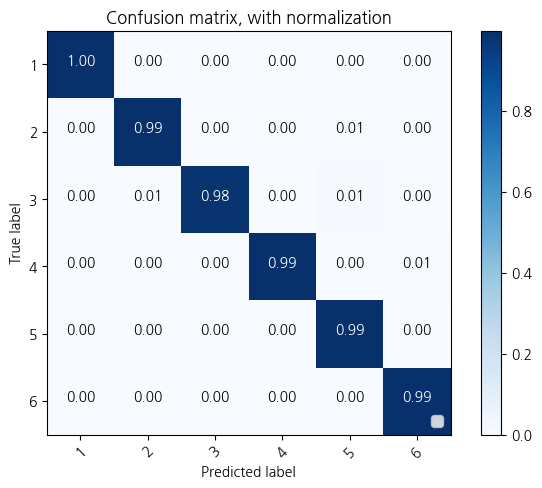

In [56]:
# Random Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 5.3 Ada Boost

In [57]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada=AdaBoostClassifier(n_estimators=10)
ada=ada.fit(X_train,y_train)

y_pred =ada.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)

ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 2 ... 6 5 3]
ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 2 ... 6 5 3]


Confusion matrix, without normalization
[[355   8   9  89  39  27]
 [ 44 359 160  23   4   0]
 [  2 129 177   5   1   1]
 [ 24   0   0 223  16 124]
 [  4   0   3  77 501  20]
 [  0   0   0  52  31 275]]
Normalized confusion matrix
[[0.67 0.02 0.02 0.17 0.07 0.05]
 [0.07 0.61 0.27 0.04 0.01 0.  ]
 [0.01 0.41 0.56 0.02 0.   0.  ]
 [0.06 0.   0.   0.58 0.04 0.32]
 [0.01 0.   0.   0.13 0.83 0.03]
 [0.   0.   0.   0.15 0.09 0.77]]


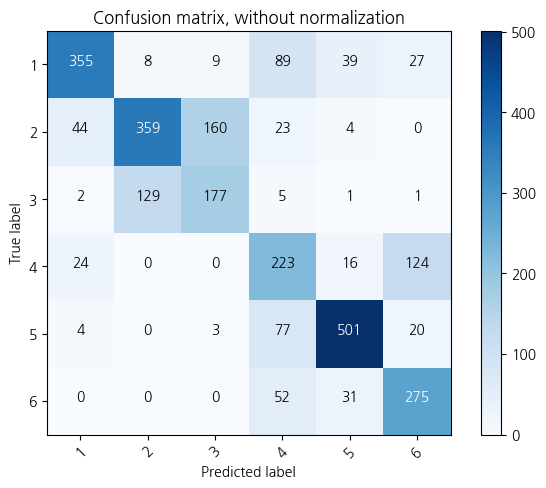

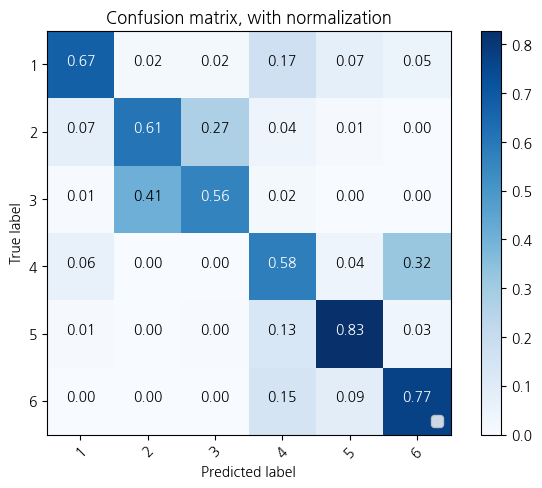

In [58]:
# Ada Boost Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 5.4 Bagging KNN

In [59]:
# Bagging with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=14),
                            max_samples=0.5, max_features=0.5)

bagging=bagging.fit(X_train,y_train)

y_pred =bagging.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(bagging,X_test,y_test).mean())

ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
cross validation acc   : 0.8465197680275887


Confusion matrix, without normalization
[[492   3   0  30   1   1]
 [  0 574   0  12   3   1]
 [  0   9 302   1   3   0]
 [ 19   5   0 355   4   4]
 [  1   0   1   3 574  26]
 [  0   0   0   6   4 348]]
Normalized confusion matrix
[[0.93 0.01 0.   0.06 0.   0.  ]
 [0.   0.97 0.   0.02 0.01 0.  ]
 [0.   0.03 0.96 0.   0.01 0.  ]
 [0.05 0.01 0.   0.92 0.01 0.01]
 [0.   0.   0.   0.   0.95 0.04]
 [0.   0.   0.   0.02 0.01 0.97]]


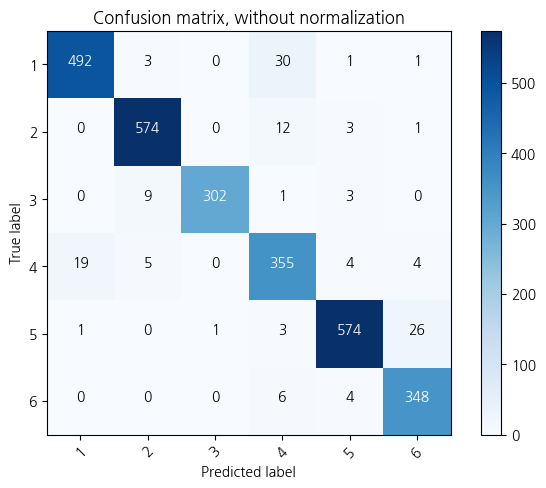

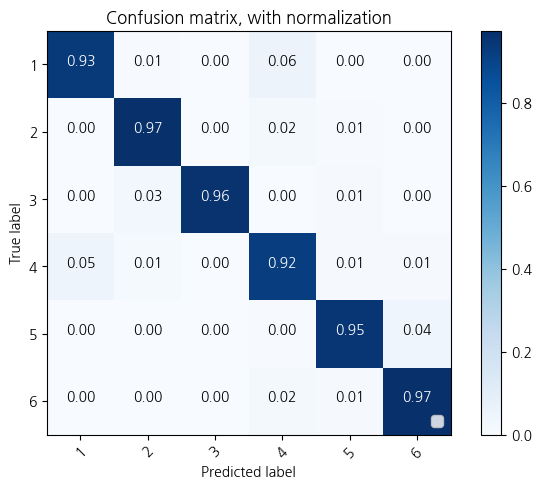

In [60]:
# Bagging with KNN Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 5.5 Decision Tree

In [61]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
tree=clf.fit(X_train,y_train)

y_pred =tree.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(tree,X_test,y_test).mean())

ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
cross validation acc   : 0.9291818968523566


Confusion matrix, without normalization
[[521   0   1   4   0   1]
 [  0 580   3   1   5   1]
 [  0   3 309   1   2   0]
 [  8   1   0 369   2   7]
 [  1   1   4   3 590   6]
 [  3   1   2   4   1 347]]
Normalized confusion matrix
[[0.99 0.   0.   0.01 0.   0.  ]
 [0.   0.98 0.01 0.   0.01 0.  ]
 [0.   0.01 0.98 0.   0.01 0.  ]
 [0.02 0.   0.   0.95 0.01 0.02]
 [0.   0.   0.01 0.   0.98 0.01]
 [0.01 0.   0.01 0.01 0.   0.97]]


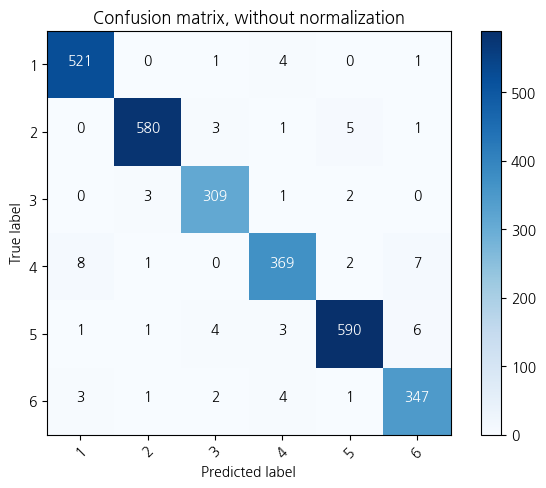

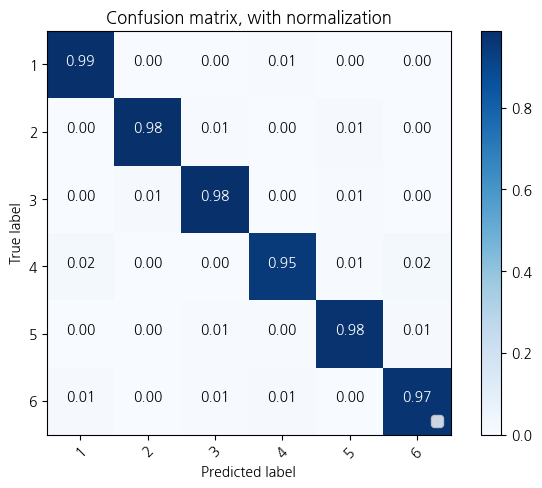

In [62]:
# Decision Tree Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 5.6 Voting Ensemble

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()
clf3= LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
clf4= KNeighborsClassifier(n_neighbors=30)
eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svm', clf3),('knn',clf4)], voting='hard')
eclf = eclf.fit(X_train,y_train)
y_pred =eclf.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(eclf,X_test,y_test).mean())

ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
ground truth           : 9934     5
3788     2
6411     3
6401     3
2563     1
        ..
9826     5
4470     2
12210    6
2090     1
5506     3
Name: Gas, Length: 2782, dtype: int64
predicted class        : [5 2 3 ... 6 1 3]
cross validation acc   : 0.9482350206011134


Confusion matrix, without normalization
[[526   0   0   1   0   0]
 [  1 582   1   2   3   1]
 [  0   5 307   0   3   0]
 [ 29   2   0 350   3   3]
 [  4   1   1   1 598   0]
 [  3   0   0   5   0 350]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.01 0.  ]
 [0.   0.02 0.97 0.   0.01 0.  ]
 [0.07 0.01 0.   0.9  0.01 0.01]
 [0.01 0.   0.   0.   0.99 0.  ]
 [0.01 0.   0.   0.01 0.   0.98]]


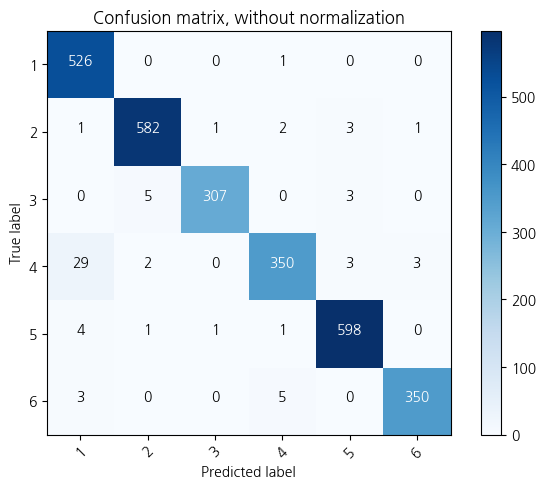

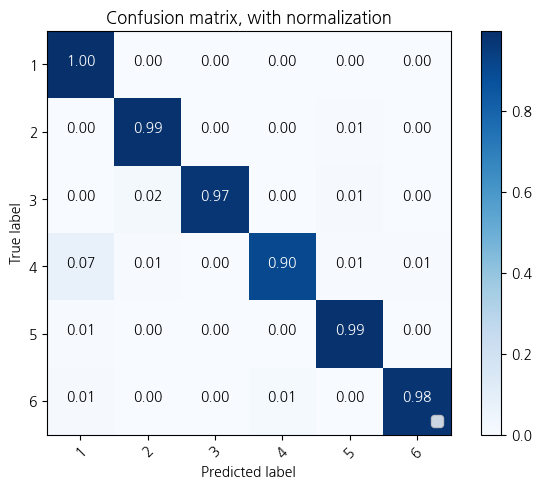

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 5.7 OneVsRestClassifier Logistic Regression

> OneVsRestClassifier 는 클래스마다 분류기를 하나씩 만들어서 학습시키는 Classifier

In [65]:
# Logistic Regression
# OneVsRestcalssifier은 클래스마다 분류기를 만들어 하나씩 만들어서 학습시키는 Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import interp
from itertools import cycle

start = time.time()

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(solver='sag',n_jobs=-1))
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict_proba(X_test)

end = time.time()
print("\nTime taken: {:.2f} seconds".format(end-start))


Time taken: 16.43 seconds


Confusion matrix, without normalization
[[526   0   0   1   0   0]
 [  1 582   1   2   3   1]
 [  0   5 307   0   3   0]
 [ 29   2   0 350   3   3]
 [  4   1   1   1 598   0]
 [  3   0   0   5   0 350]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.01 0.  ]
 [0.   0.02 0.97 0.   0.01 0.  ]
 [0.07 0.01 0.   0.9  0.01 0.01]
 [0.01 0.   0.   0.   0.99 0.  ]
 [0.01 0.   0.   0.01 0.   0.98]]


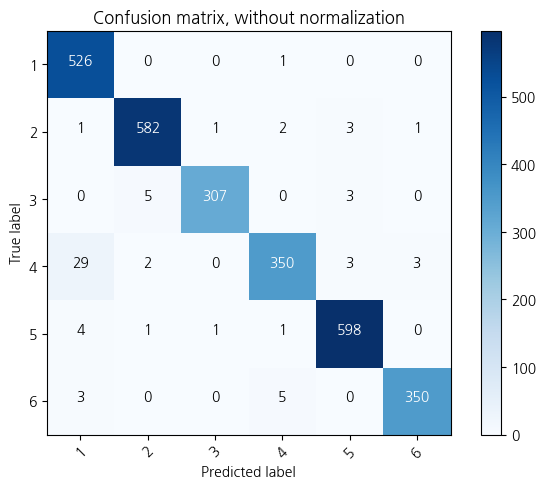

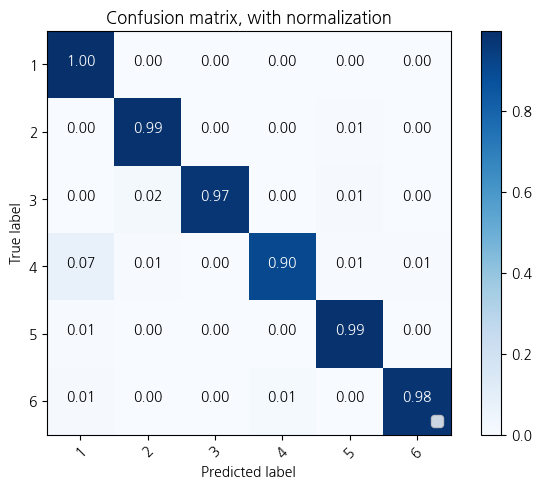

In [66]:
# y_pred1.argmax(axis=1)의 클래스 값을 1씩 증가시킴
y_pred_adjusted = y_pred1.argmax(axis=1) + 1

# Logistic Regression Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_adjusted)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [67]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_adjusted)
confusion_matrix

array([[503,   0,   0,  19,   4,   1],
       [  4, 573,   0,   0,  12,   1],
       [  0,   8, 304,   0,   3,   0],
       [171,   5,   0, 197,  14,   0],
       [  4,   0,   1,   0, 595,   5],
       [  5,  12,   0,   1,  26, 314]])

In [68]:
auc_roc = metrics.classification_report(y_test, y_pred_adjusted)
print('Logistic Regression Classification Report:\n {}'.format(auc_roc))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.95      0.83       527
           2       0.96      0.97      0.96       590
           3       1.00      0.97      0.98       315
           4       0.91      0.51      0.65       387
           5       0.91      0.98      0.95       605
           6       0.98      0.88      0.92       358

    accuracy                           0.89      2782
   macro avg       0.91      0.88      0.88      2782
weighted avg       0.90      0.89      0.89      2782



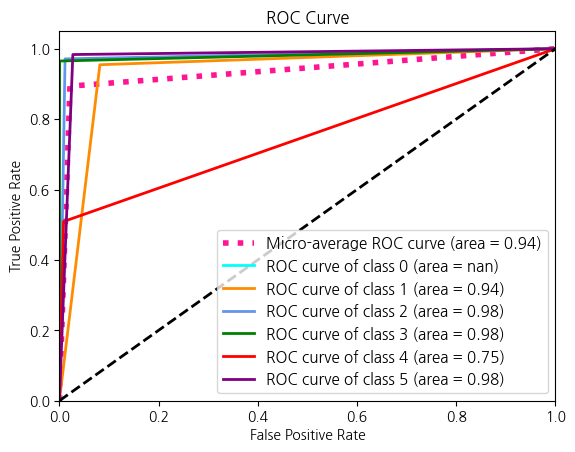

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 각 클래스에 대한 FPR과 TPR을 계산합니다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i), y_pred_adjusted == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# 모든 클래스에 대한 평균 ROC 곡선을 계산합니다.
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

# Micro-average ROC AUC를 계산합니다.
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), label_binarize(y_pred_adjusted, classes=np.unique(y_test)).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC AUC를 계산합니다.
roc_auc["macro"] = np.mean([roc_auc[i] for i in range(n_classes)])

# 모든 클래스에 대한 ROC 커브를 그립니다.
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 6.Feature Selction Modeling

## 6.1 Logistic regression with RFE

In [75]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
# Scailing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_binarize(y_train, classes=[1,2,3,4,5,6])
y_test = label_binarize(y_test, classes=[1,2,3,4,5,6])
y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

In [82]:
from sklearn.feature_selection import RFE

# 이진 분류기에 사용할 모델 정의 (예: LogisticRegression)
binary_model = LogisticRegression(solver='sag', n_jobs=-1)

# RFE에 이진 분류기를 사용하여 객체 생성
rfe = RFE(binary_model, n_features_to_select=64, verbose=1, step=1)

# RFE 객체를 사용하여 훈련 데이터에 맞춤
rfe = rfe.fit(X_train, y_train_1d)

Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
F

In [83]:
# RFE 알고리즘에 의해 선택된 Feature 리스트
features = X.columns[rfe.support_]
print(features)
X_train_rfe = pd.DataFrame(X_train)[features]
X_test_rfe = pd.DataFrame(X_test)[features]

Index([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  23,  24,
        25,  26,  27,  28,  33,  36,  38,  41,  44,  46,  65,  66,  67,  68,
        69,  70,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,  86,
        89,  92,  94,  95,  97,  98,  99, 100, 102, 103, 105, 106, 107, 108,
       110, 113, 114, 116, 117, 122, 124, 125],
      dtype='object')


In [84]:
classifier = OneVsRestClassifier(LogisticRegression(solver='sag',n_jobs=-1))
classifier.fit(X_train_rfe, y_train)
y_pred11 = classifier.predict_proba(X_test_rfe)

In [94]:
y_train

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [95]:
y_pred11

array([[5.88e-03, 5.08e-04, 1.48e-02, 9.82e-02, 9.80e-01, 1.28e-01],
       [2.35e-03, 1.00e+00, 1.42e-03, 6.41e-03, 1.26e-03, 2.56e-06],
       [2.10e-02, 7.22e-02, 7.58e-01, 2.16e-01, 3.54e-02, 9.26e-02],
       ...,
       [1.28e-02, 4.59e-03, 3.10e-02, 1.63e-01, 1.87e-01, 7.74e-01],
       [9.97e-01, 5.92e-05, 5.61e-07, 1.42e-01, 2.58e-05, 4.48e-03],
       [8.35e-03, 2.06e-02, 9.63e-01, 1.68e-01, 2.63e-02, 1.86e-02]])

In [98]:
y_pred_adjusted_11 = y_pred11.argmax(axis=1)

In [99]:
# Logistic regrssion Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test_1d,y_pred_adjusted_11)
confusion_matrix

array([[507,   0,   0,  19,   1,   0],
       [  1, 582,   0,   2,   4,   1],
       [  0,  19, 282,   8,   3,   3],
       [ 16,   1,   0, 308,   8,  54],
       [  2,   0,   1,   6, 571,  25],
       [  1,   0,   0,   3,  17, 337]])

In [100]:
auc_roc = metrics.classification_report(y_test_1d,y_pred_adjusted_11)
print('Logistic regression with Recursive Feature Elimination:\n {}'.format(auc_roc))

Logistic regression with Recursive Feature Elimination:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       527
           1       0.97      0.99      0.98       590
           2       1.00      0.90      0.94       315
           3       0.89      0.80      0.84       387
           4       0.95      0.94      0.94       605
           5       0.80      0.94      0.87       358

    accuracy                           0.93      2782
   macro avg       0.93      0.92      0.92      2782
weighted avg       0.93      0.93      0.93      2782



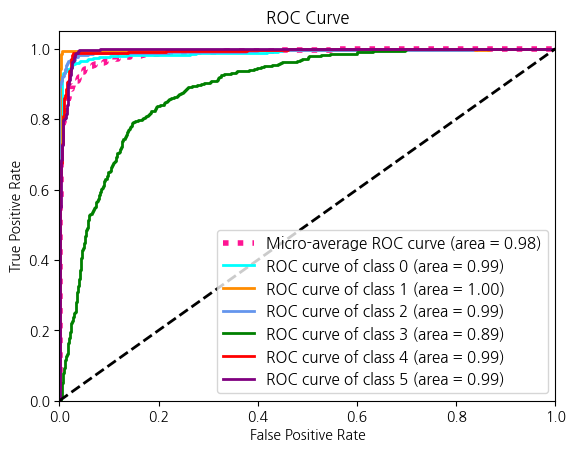

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 각 클래스에 대한 FPR과 TPR을 계산합니다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_1d == i), y_pred11[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 모든 클래스에 대한 평균 ROC 곡선을 계산합니다.
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

# Micro-average ROC AUC를 계산합니다.
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test_1d, classes=np.unique(y_test_1d)).ravel(), y_pred11.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC AUC를 계산합니다.
roc_auc["macro"] = np.mean([roc_auc[i] for i in range(n_classes)])

# 모든 클래스에 대한 ROC 커브를 그립니다.
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 6.2 Logistic regression with SelectKBest (Chi Square test)

In [109]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

y_train = label_binarize(y_train, classes=[1,2,3,4,5,6])
y_test = label_binarize(y_test, classes=[1,2,3,4,5,6])
y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

In [110]:
# Logistic regression with SelecKBest(Chi Square test)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2 ,SelectKBest

# MinMaxScaler 적용
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)

In [111]:
selector = SelectKBest(chi2, k=64)
selector.fit(X_train_norm, y_train)
X_train_kbest = selector.transform(X_train)
X_test_kbest = selector.transform(X_test)

In [112]:
classifier = OneVsRestClassifier(LogisticRegression(solver='sag',n_jobs=-1))
classifier.fit(X_train_kbest, y_train)
y_pred12 = classifier.predict_proba(X_test_kbest)

In [113]:
# Logistic regression with SelecKBest Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1),y_pred12.argmax(axis=1))
confusion_matrix

array([[503,   0,   0,  19,   4,   1],
       [  4, 574,   0,   0,  11,   1],
       [  0,   8, 304,   0,   3,   0],
       [171,   5,   0, 197,  14,   0],
       [  4,   0,   1,   0, 595,   5],
       [  5,  11,   0,   1,  27, 314]])

In [114]:
auc_roc = metrics.classification_report(np.argmax(y_test, axis=1),np.argmax(y_pred12, axis=1))
print('Logistic regression with chi2 test feature selection:\n {}'.format(auc_roc))

Logistic regression with chi2 test feature selection:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83       527
           1       0.96      0.97      0.97       590
           2       1.00      0.97      0.98       315
           3       0.91      0.51      0.65       387
           4       0.91      0.98      0.95       605
           5       0.98      0.88      0.92       358

    accuracy                           0.89      2782
   macro avg       0.91      0.88      0.88      2782
weighted avg       0.91      0.89      0.89      2782



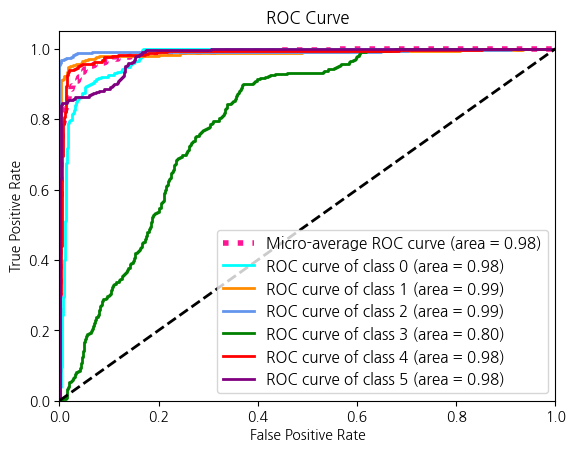

In [119]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 각 클래스에 대한 FPR과 TPR을 계산합니다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_1d == i), y_pred12[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 모든 클래스에 대한 평균 ROC 곡선을 계산합니다.
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

# Micro-average ROC AUC를 계산합니다.
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test_1d, classes=np.unique(y_test_1d)).ravel(), y_pred11.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC AUC를 계산합니다.
roc_auc["macro"] = np.mean([roc_auc[i] for i in range(n_classes)])

# 모든 클래스에 대한 ROC 커브를 그립니다.
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()